# Pymaceuticals Inc.
---

### Analysis
Summary and conclusions from the data analysis: There was a positive correlation between mouse weight and tumor size with a correlation of 0.84. It would be wise for the mice to have a healthy weight in order to improve tumor size.

Capomulin and Ramicane drug regimens were the best performing with the lowest tumor size mean and the lowest standard deviation. Ketapril was the worst performing drug regimen with the highest tumor size mean and the highest standard deviation.

Capomulin drug regimen was effective in decreasing tumor size in mouse I509 over time. This conclusion is illustrated in the line plot below.

Further research into Capomulin and Ramicane drug regimens should be conducted to improve efficiency. 

 

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="right")

# Display the data table for preview

combined_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [122]:
# Checking the number of mice.
unique_mice = combined_mouse_data['Mouse ID'].unique()
total_mice = len(unique_mice)
total_mice


249

In [123]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_mouse_data[combined_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"])]
dup_mice_ID       

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [124]:
# Optional: Get all the data for the duplicate mouse ID. 
mask= combined_mouse_data['Mouse ID']== 'g989'
dup_mice_df = pd.DataFrame(combined_mouse_data.loc[mask])
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [125]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_mouse_data.drop_duplicates(subset=['Mouse ID'])# doesnt work 
clean_df= combined_mouse_data[combined_mouse_data['Mouse ID'].isin(dup_mice_df['Mouse ID'])==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [126]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = clean_df['Mouse ID'].unique()
total_mice2 = len(unique_mice2)
total_mice2

248

## Summary Statistics

In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_drug =clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_drug =clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance_drug=clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_dev_drug=clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SEM_drug= clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

stat_summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_drug,
    'Median Tumor Volume': median_drug,
    'Tumor Vloume Variance': variance_drug,
    'Tumor Volume Std. Dev.': std_dev_drug,
    'Tumor Volume Std. Err.': SEM_drug,
})
stat_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Vloume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median', 'var','std','sem'])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice Tested Per Drug Regimen')

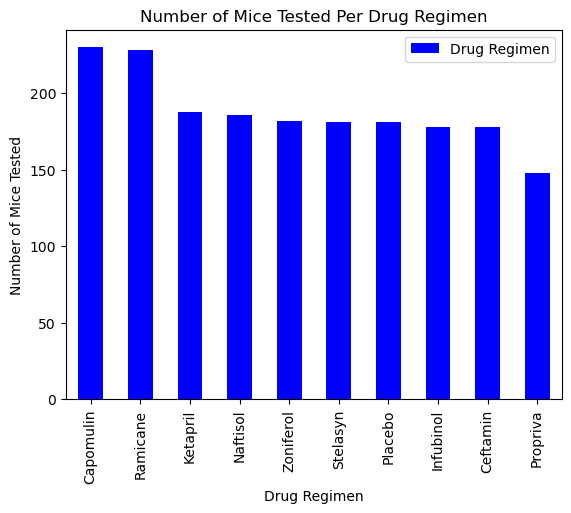

In [128]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

num_mice = clean_df['Drug Regimen'].value_counts()  #collects num of mice tested per drug
num_mice_df = pd.DataFrame(num_mice)
num_mice_df.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested Per Drug Regimen")


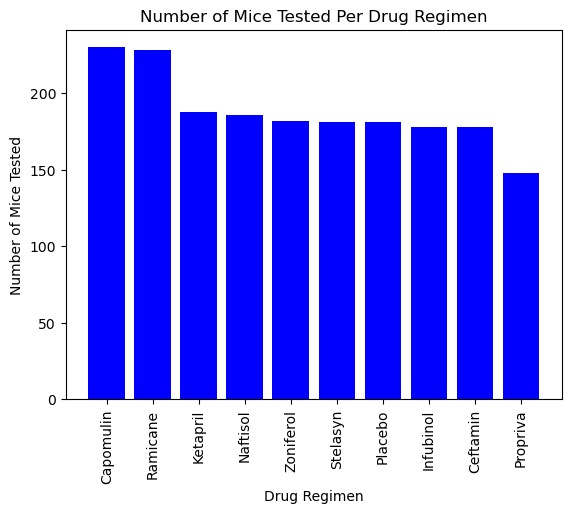

In [106]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(num_mice_df))
tick_loc =[value+0.4 for value in x_axis]

plt.bar(x_axis, num_mice_df['Drug Regimen'] , color='b', alpha =1, align='edge')
plt.xticks(tick_loc, num_mice_df.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested Per Drug Regimen")
plt.show()


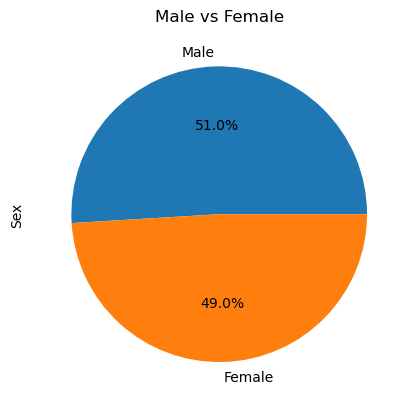

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df['Sex'].value_counts()
sex_data.plot.pie(autopct= '%1.1f%%')
plt.title('Male vs Female')
plt.show()


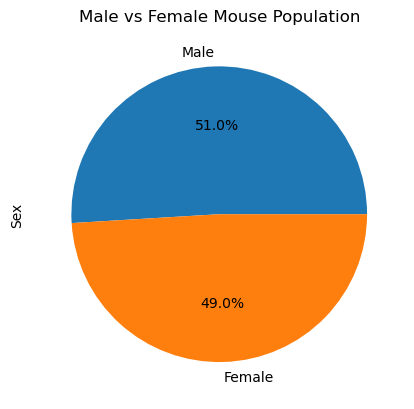

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = sex_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [137]:
Capomulin = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin", :] #get all data for each drug reg from clean data
Ramicane= clean_df.loc[clean_df["Drug Regimen"]== "Ramicane", :]
Infubinol= clean_df.loc[clean_df["Drug Regimen"]== "Infubinol", :]
Ceftamin= clean_df.loc[clean_df["Drug Regimen"]== "Ceftamin", :]
Capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
226,j246,Capomulin,Female,21,21,0,45.0,0
227,r554,Capomulin,Female,8,17,0,45.0,0
228,s185,Capomulin,Female,3,17,0,45.0,0
229,b742,Capomulin,Male,7,21,0,45.0,0


In [138]:
# Start by getting the last (greatest) timepoint for each mouse
mouse_data = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
by_mouse_ID= mouse_data.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = by_mouse_ID[['Mouse ID', 'Timepoint']]. merge(clean_df, on=['Mouse ID', 'Timepoint'], how="left")
merged_data

drug_dir = {"names": ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
           "tumor_vol":[[],[],[],[]]}

for i in range (len(drug_dir["names"])):
    for j in range (len(merged_data)):
        if merged_data.loc[j,"Drug Regimen"]== drug_dir["names"][i]:
            drug_dir["tumor_vol"][i].append(merged_data.loc[j,"Tumor Volume (mm3)"])
            
    values = drug_dir["tumor_vol"][i]       
    quartiles =  np.quantile(values,[.25, .5, .75])
    first_quart= np.quantile(values,[.25])
    last_quart= np.quantile(values,[.75])                                     
    range_quart=last_quart-first_quart 
    lower_bound= first_quart - (1.5 * range_quart)
    upper_bound= last_quart + (1.5 * range_quart)
           
 
    for x in range (len(merged_data)):
            if (merged_data.loc[x,"Drug Regimen"]== drug_dir["names"][i]) & ((merged_data.loc[x,"Tumor Volume (mm3)"] < lower_bound) | (merged_data.loc[x,"Tumor Volume (mm3)"]> upper_bound)):             
            
                outlier_index= merged_data.index[x]
                outlier_vol= merged_data.loc[x,"Tumor Volume (mm3)"] 
            
    print(f"{drug_dir['names'][i]}'s potential outlier:{outlier_index, outlier_vol} Name: Tumor Volume (mm3), dtype:float64") 
    outlier_index =''
    outlier_vol ='' 

Capomulin's potential outlier:('', '') Name: Tumor Volume (mm3), dtype:float64
Ramicane's potential outlier:('', '') Name: Tumor Volume (mm3), dtype:float64
Infubinol's potential outlier:(31, 36.3213458) Name: Tumor Volume (mm3), dtype:float64
Ceftamin's potential outlier:('', '') Name: Tumor Volume (mm3), dtype:float64


In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [51]:
# make array with drug and create a list (Put treatments into a list for a for loop (and later for plot labels))

# Create empty list to fill with tumor vol data (for plotting

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

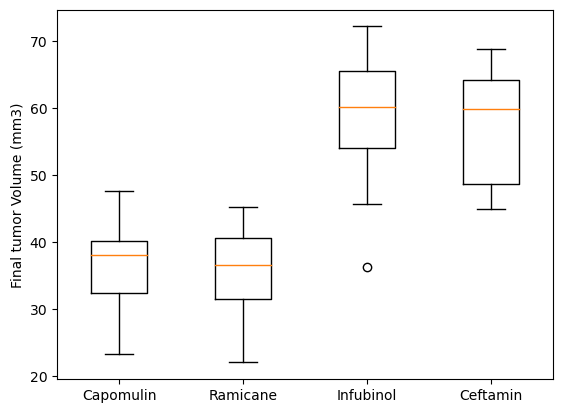

In [143]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

Capomulin_df = drug_dir["tumor_vol"][0]
Ramicane_df= drug_dir["tumor_vol"][1]
Infubinol_df= drug_dir["tumor_vol"][2]
Ceftamin_df= drug_dir["tumor_vol"][3]

plt.boxplot([Capomulin_df, Ramicane_df, Infubinol_df,Ceftamin_df ], labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])  
plt.ylabel('Final tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

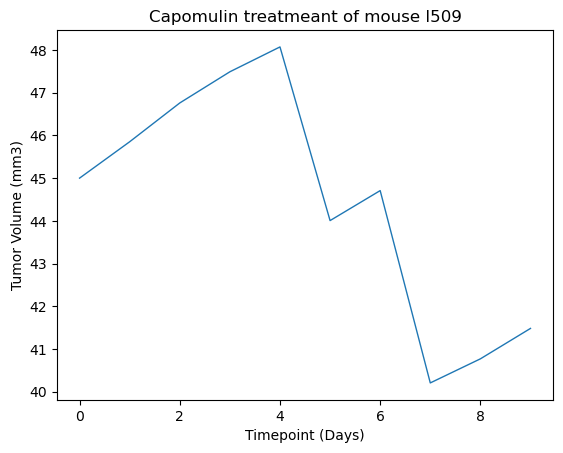

In [144]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df =clean_df.loc[clean_df["Mouse ID"]== "l509", :]
X_axis = line_df['Timepoint']

Y_axis=line_df['Tumor Volume (mm3)']

plt.plot(x_axis, Y_axis ,linewidth=1, )
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

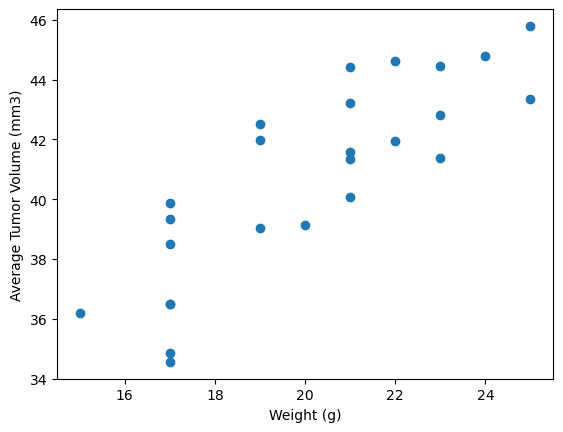

In [141]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_mean = Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(cap_mean['Weight (g)'],cap_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


Text(0, 0.5, 'Average Tumore Volume (mm3)')

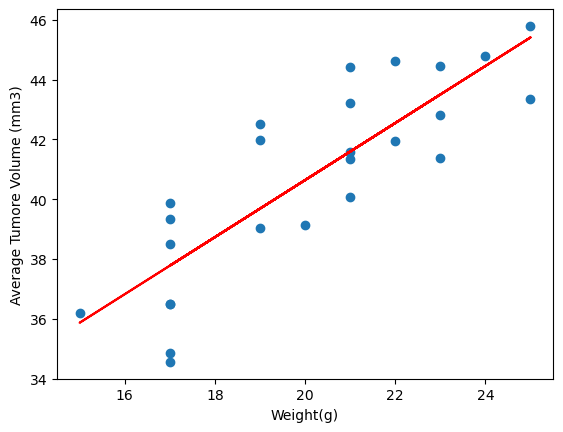

In [146]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mean_weight =cap_mean['Weight (g)']
mean_vol =cap_mean['Tumor Volume (mm3)']
corr=round(st.pearsonr(mean_weight, mean_vol)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mean_weight, mean_vol)
regress_values = mean_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mean_weight,regress_values,"r-")


plt.scatter(mean_weight, mean_vol)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')